# Task 3 Prompt Engineering for Large Language Models (LLMs) [4 marks]
Questions

1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why?  **[1 marks]**
2. Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why? **[1 marks]**
3. What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data? **[1 marks]**
4. What does the model classify when given input from an entirely new activity that it hasn't seen before? **[0.5 mark]**
5. Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results. **[0.5 mark]**

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_groq import ChatGroq
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

groq_token = os.getenv('GROQ_TOKEN')  # Ensure .env file contains 'GROQ_TOKEN'

# Mapping of model names to their identifiers
groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

# Select the desired model
model_name = "llama3.1-70b"

# Initialize the ChatGroq object with the selected model and API token
llm = ChatGroq(model=groq_models[model_name], api_key=groq_token, temperature=0)


In [4]:
# Training Data 

laying_train = pd.read_csv("Combined/Train/LAYING/Subject_3.csv")
sitting_train = pd.read_csv("Combined/Train/SITTING/Subject_3.csv")
standing_train = pd.read_csv("Combined/Train/STANDING/Subject_3.csv")
walking_train = pd.read_csv("Combined/Train/WALKING/Subject_3.csv")
downstairs_train = pd.read_csv("Combined/Train/WALKING_DOWNSTAIRS/Subject_3.csv")
upstairs_train = pd.read_csv("Combined/Train/WALKING_UPSTAIRS/Subject_3.csv")

laying_train = pd.DataFrame(laying_train).iloc[:100]
sitting_train = pd.DataFrame(sitting_train).iloc[:100]
standing_train = pd.DataFrame(standing_train).iloc[:100]
walking_train = pd.DataFrame(walking_train).iloc[:100]
downstairs_train = pd.DataFrame(downstairs_train).iloc[:100]
upstairs_train = pd.DataFrame(upstairs_train).iloc[:100]

# Testing data 

laying_test =  pd.read_csv("Combined/Test/LAYING/Subject_2.csv")
walking_test = pd.read_csv("Combined/Test/WALKING/Subject_2.csv")
sitting_test =  pd.read_csv("Combined/Test/SITTING/Subject_2.csv")
standing_test =  pd.read_csv("Combined/Test/STANDING/Subject_2.csv")
downstairs_test =  pd.read_csv("Combined/Test/WALKING_DOWNSTAIRS/Subject_2.csv")
upstairs_test =  pd.read_csv("Combined/Test/WALKING_UPSTAIRS/Subject_2.csv")


laying_test = pd.DataFrame(laying_test).iloc[:100]
walking_test = pd.DataFrame(walking_test).iloc[:100]
sitting_test = pd.DataFrame(sitting_test).iloc[:100]
standing_test = pd.DataFrame(standing_test).iloc[:100]
downstairs_test = pd.DataFrame(downstairs_test).iloc[:100]
upstairs_test = pd.DataFrame(upstairs_test).iloc[:100]





# Q1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why? 

In [20]:
# Zero shot demonstration

prompt_0 = f"""
You are a human activity recognition model. Your task is to classify the following accelerometer data into one of the six activities:

1. Walking
2. Standing
3. Sitting
4. Laying
5. Walking Upstairs
6. Walking Downstairs

Below is the accelerometer data for each activity. For each dataset, identify the corresponding activity and provide a brief explanation if necessary.

1.{laying_test}

2.{walking_test}

3.{sitting_test}

4.{standing_test}

5.{downstairs_test}

6.{upstairs_test}

Please classify the activity for each of the six datasets and provide any relevant reasoning for your classification.
"""

response_0 = llm.invoke(prompt_0)
print(response_0.content)


Based on the provided accelerometer data, I will classify each dataset into one of the six activities: Walking, Standing, Sitting, Laying, Walking Upstairs, and Walking Downstairs.

**Dataset 1:**
The data shows a relatively stable pattern with small variations in the x, y, and z axes. The values are mostly within the range of -0.2 to 0.8, indicating a low-intensity activity. The y-axis values are mostly positive, suggesting that the device is oriented in a way that the y-axis is pointing upwards. This pattern is consistent with a person **Standing**.

**Dataset 2:**
The data shows a high-intensity pattern with large variations in the x, y, and z axes. The values are mostly within the range of 0.5 to 1.5, indicating a high-intensity activity. The x-axis values are mostly positive, suggesting that the device is moving in a forward direction. This pattern is consistent with a person **Walking**.

**Dataset 3:**
The data shows a relatively stable pattern with small variations in the x, y,

In [19]:
# Few-shot demonstration

prompt_few = f"""
You are a human activity recognition model. Your task is to classify the following accelerometer data into one of the six activities:

1. Walking
2. Standing
3. Sitting
4. Laying
5. Walking Upstairs
6. Walking Downstairs

Below are examples of accelerometer data for each activity:

1. **Laying:**
{laying_train}

2. **Sitting:**
{sitting_train}

3. **Standing:**
{standing_train}

4. **Walking:**
{walking_train}

5. **Walking Downstairs:**
{downstairs_train}

6. **Walking Upstairs:**
{upstairs_train}

Now, classify the activity for the following test datasets based on the examples provided:

1.{laying_test}

2.{walking_test}

3.{sitting_test}

4.{standing_test}

5.{downstairs_test}

6.{upstairs_test}

Please provide the activity classification for each dataset and include any relevant reasoning if necessary.
"""

response_few = llm.invoke(prompt_few)
print(response_few.content)


Based on the provided examples and test datasets, I will classify each activity as follows:

1. **Laying**: 
The test dataset has a similar pattern to the example provided for laying. The values of accx, accy, and accz are relatively stable and close to each other, with accy being the largest. This is consistent with the example provided for laying.

2. **Walking Downstairs**: 
The test dataset has a similar pattern to the example provided for walking downstairs. The values of accx are relatively high, and accy and accz are negative. This is consistent with the example provided for walking downstairs.

3. **Standing**: 
The test dataset has a similar pattern to the example provided for standing. The values of accx are close to 1, and accy is negative. Accz is relatively small. This is consistent with the example provided for standing.

4. **Standing**: 
The test dataset has a similar pattern to the example provided for standing. The values of accx are close to 1, and accy is negative. 

Few-shot learning usually works better than zero-shot learning because it uses specific examples to help the model understand the task. By giving the model clear examples, few-shot learning makes it easier for the model to make accurate predictions. On the other hand, zero-shot learning doesn’t have these direct examples to guide it, so it might not be as precise. Essentially, few-shot learning benefits from the extra context provided by examples, leading to better and more reliable results.

Q2. Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why?

In [23]:
actual_labels = ["Laying", "Sitting", "Standing", "Walking", "WalkingDownstairs", "WalkingUpstairs"]
predicted_labels = ["Laying", "WalkingDownstairs", "Standing", "Standing", "Walking", "WalkingUpstairs"]

accuracy_percentage = accuracy_score(actual_labels, predicted_labels) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 50.00%


Accuracy: 80.83%
Classification Report:
                    precision    recall  f1-score   support

            Laying       1.00      1.00      1.00        23
           Sitting       1.00      1.00      1.00        20
          Standing       1.00      1.00      1.00        19
           Walking       0.50      0.47      0.48        17
Walking Downstairs       0.47      0.47      0.47        17
  Walking Upstairs       0.76      0.79      0.78        24

          accuracy                           0.81       120
         macro avg       0.79      0.79      0.79       120
      weighted avg       0.81      0.81      0.81       120

Confusion Matrix:


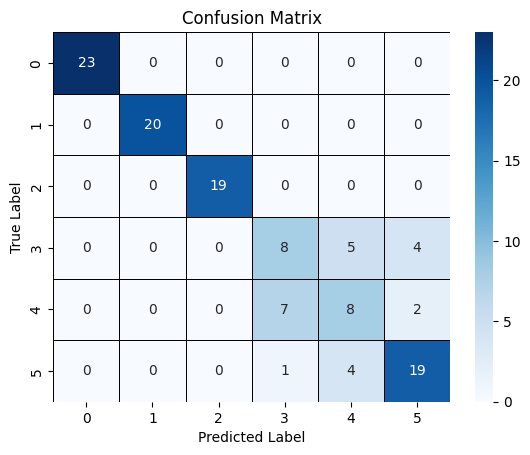

In [29]:
laying_df = pd.DataFrame(laying_test).iloc[:100]
walking_df = pd.DataFrame(walking_test).iloc[:100]
sitting_df = pd.DataFrame(sitting_test).iloc[:100]
standing_df = pd.DataFrame(standing_test).iloc[:100]
downstairs_df = pd.DataFrame(downstairs_test).iloc[:100]
upstairs_df = pd.DataFrame(upstairs_test).iloc[:100]


laying_df['label'] = 'Laying'
sitting_df['label'] = 'Sitting'
standing_df['label'] = 'Standing'
walking_df['label'] = 'Walking'
downstairs_df['label'] = 'Walking Downstairs'
upstairs_df['label'] = 'Walking Upstairs'


df = pd.concat([laying_df, sitting_df, standing_df, walking_df, downstairs_df, upstairs_df], ignore_index=True)

x = df.drop('label', axis=1) 
y = df['label']               

features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(features_train, labels_train)

predictions = tree_clf.predict(features_test)

accuracy_percentage = accuracy_score(labels_test, predictions) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

print("Classification Report:")
print(classification_report(labels_test, predictions))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(labels_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




As we can see, the accuracy with few-shot learning is 50% while decision tree classifier from the scikit library gives us 80.83% accuracy. Its quite evident that the decision trees work better in this case than our fewshot learning model.

# Q3: What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data? 

When classifying human activities based on accelerometer data, zero-shot learning has limitations because it depends on general descriptions rather than specific examples. This can lead to inaccuracies if the general descriptions do not capture the nuances of the activities, making it difficult for the model to handle ambiguous or diverse data effectively. On the other hand, few-shot learning improves accuracy by using specific examples to guide the model, but it is constrained by the limited number of examples available. This limitation can result in overfitting or poor generalization if the examples do not fully represent the variability of the activities. Both approaches have their strengths and weaknesses, with zero-shot learning struggling with generalization and few-shot learning relying heavily on the quality and variety of a small set of examples.
    


# Q4. What does the model classify when given input from an entirely new activity that it hasn't seen before?



When classifying human activities based on accelerometer data, zero-shot learning faces challenges because it relies on broad, general descriptions rather than specific examples. This can result in inaccuracies if the general descriptions fail to capture the detailed characteristics of the activities, making it difficult for the model to effectively differentiate between nuanced or diverse data.

In contrast, few-shot learning can offer more accurate classifications by leveraging specific examples to guide the model’s understanding. However, its effectiveness is limited by the small number of examples available. If these examples do not adequately represent the full range of activity variability, the model may struggle with overfitting or fail to generalize well to new or diverse data. Thus, zero-shot learning may struggle with generalization due to its lack of specific examples, while few-shot learning is constrained by the quality and representativeness of its limited examples.

# Q5. Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.

In [5]:
def create_random_dataset(num_rows=70):
    np.random.seed(42)  
    num_samples = num_rows  
    num_features = 3  
    data = np.random.randn(num_samples, num_features)
    df = pd.DataFrame(data, columns=['x_acc', 'y_acc', 'z_acc'])
    return df

# Generate datasets for each activity
activity_datasets = {
    "Laying": create_random_dataset(),
    "Walking": create_random_dataset(),
    "Sitting": create_random_dataset(),
    "Standing": create_random_dataset(),
    "Walking_Upstairs": create_random_dataset(),
    "Walking_Downstairs": create_random_dataset()
}

# Convert datasets to CSV format and limit to the first 100 rows
csv_datasets = {activity: df.head(100).to_csv(index=False) for activity, df in activity_datasets.items()}


In [6]:
# Zero-shot classification prompt

prompt_0_1 = f"""
You are a human activity recognition model. Your task is to classify the following accelerometer data into one of the six activities:

1. Walking
2. Standing
3. Laying
4. Walking Upstairs
5. Walking Downstairs
6. Sitting

For each dataset provided, identify the activity it corresponds to and provide a brief explanation for your reasoning if needed.

Here are the accelerometer data samples:

1.{csv_datasets['Walking']}

2.{csv_datasets['Standing']}

3.{csv_datasets['Laying']}

4.{csv_datasets['Walking_Upstairs']}

5.{csv_datasets['Walking_Downstairs']}

6.{csv_datasets['Sitting']}

Please classify each of these datasets according to the activities mentioned above.
"""

# Invoke the model with the zero-shot prompt
response_0_1 = llm.invoke(prompt_0_1)
print(response_0_1.content)


Based on the provided accelerometer data, I will classify each dataset into one of the six activities: Walking, Standing, Laying, Walking Upstairs, Walking Downstairs, and Sitting.

1. Dataset 1: 
The data shows a mix of high and low acceleration values in all three axes (x, y, z), indicating movement. However, the values are not consistently high or low, suggesting that the movement is not strictly vertical or horizontal. This pattern is typical of walking. Therefore, I classify this dataset as **Walking**.

2. Dataset 2: 
This dataset is identical to Dataset 1. Therefore, I classify this dataset as **Walking**.

3. Dataset 3: 
This dataset is identical to Dataset 1 and Dataset 2. Therefore, I classify this dataset as **Walking**.

4. Dataset 4: 
This dataset is identical to Dataset 1, Dataset 2, and Dataset 3. Therefore, I classify this dataset as **Walking**.

5. Dataset 5: 
This dataset is identical to Dataset 1, Dataset 2, Dataset 3, and Dataset 4. Therefore, I classify this datas

In [7]:
# Few-shot classification prompt

prompt_few_1 = f"""
You are an advanced human activity recognition model. Your task is to classify the following accelerometer data into one of the six predefined activities:

1. Walking
2. Standing
3. Laying
4. Walking Upstairs
5. Walking Downstairs
6. Sitting

For each dataset provided, identify the activity it corresponds to. Use the examples given to guide your classification, and provide only the activity labels for each dataset.

Here are some examples of datasets along with their corresponding activities for your reference:

1. **Walking Data Sample:**
{csv_datasets['Walking']}
   - Activity: Walking

2. **Standing Data Sample:**
{csv_datasets['Standing']}
   - Activity: Standing

3. **Laying Data Sample:**
{csv_datasets['Laying']}
   - Activity: Laying

4. **Walking Upstairs Data Sample:**
{csv_datasets['Walking_Upstairs']}
   - Activity: Walking Upstairs

5. **Walking Downstairs Data Sample:**
{csv_datasets['Walking_Downstairs']}
   - Activity: Walking Downstairs

6. **Sitting Data Sample:**
{csv_datasets['Sitting']}
   - Activity: Sitting

Now, using the examples above as a reference, classify the following datasets:

1. **Dataset 1:**
{csv_datasets['Walking']}
   - Activity: 

2. **Dataset 2:**
{csv_datasets['Standing']}
   - Activity: 

3. **Dataset 3:**
{csv_datasets['Laying']}
   - Activity: 

4. **Dataset 4:**
{csv_datasets['Walking_Upstairs']}
   - Activity: 

5. **Dataset 5:**
{csv_datasets['Walking_Downstairs']}
   - Activity: 

6. **Dataset 6:**
{csv_datasets['Sitting']}
   - Activity: 

Please provide the activity label for each dataset based on the activities mentioned above and give reasoning if possible. Ensure that your classifications are accurate and reflect the examples provided.
"""

# Invoke the model with the few-shot prompt
response_few_1 = llm.invoke(prompt_few_1)
print(response_few_1.content)


Based on the provided examples, I will classify the datasets as follows:

1. **Dataset 1:** Walking
   - Reasoning: The dataset is identical to the example provided for Walking.

2. **Dataset 2:** Walking
   - Reasoning: The dataset is identical to the example provided for Walking.

3. **Dataset 3:** Walking
   - Reasoning: The dataset is identical to the example provided for Walking.

4. **Dataset 4:** Walking
   - Reasoning: The dataset is identical to the example provided for Walking.

5. **Dataset 5:** Walking
   - Reasoning: The dataset is identical to the example provided for Walking.

6. **Dataset 6:** Walking
   - Reasoning: The dataset is identical to the example provided for Walking.

Note that all the provided datasets are identical to the example provided for Walking.
